In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df_train_est_A = pd.read_csv('train_est_C.csv')
df_train_obs_A = pd.read_csv('train_obs_C.csv')
df_test_A = pd.read_csv('X_test_C.csv')
df_train_est_A = df_train_est_A.rename(columns={'Unnamed: 0': 'date_forecast'})

df_train_obs_A = df_train_obs_A.rename(columns={'Unnamed: 0': 'date_forecast'})

df_test_A = df_test_A.rename(columns={'Unnamed: 0': 'date_forecast'})

df_train_est_A.set_index('date_forecast', inplace=True)
df_train_obs_A.set_index('date_forecast', inplace=True)
df_test_A.set_index('date_forecast', inplace=True)
df_train_obs_A.index = pd.to_datetime(df_train_obs_A.index)
df_train_obs_A.index = pd.to_datetime(df_train_obs_A.index)

In [18]:
df_train_est_A=df_train_est_A.drop(columns=['date_calc'])


In [19]:

df = pd.concat([df_train_obs_A,df_train_est_A])
df.index = pd.to_datetime(df.index)
df['hours'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df_test_A.index = pd.to_datetime(df_test_A.index)
df_test_A['hours'] = df_test_A.index.hour
df_test_A['day'] = df_test_A.index.day
df_test_A['month'] = df_test_A.index.month
df_test_A['year'] = df_test_A.index.year
df_test_A = df_test_A.drop(columns = 'date_calc', axis = 1)

In [20]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_test_A = df_test_A.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [21]:
df['snow_densitykgm3'].fillna(0)
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.fillna(0)

,absolute_humidity_2mgm3,air_density_2mkgm3,ceiling_height_aglm,clear_sky_energy_1hJ,clear_sky_radW,cloud_base_aglm,dew_or_rimeidx,dew_point_2mK,diffuse_radW,diffuse_rad_1hJ,...,visibilitym,wind_speed_10mms,wind_speed_u_10mms,wind_speed_v_10mms,wind_speed_w_1000hPams,pv_measurement,hours,day,month,year
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,5.475,1.24075,1130.0250,0.00,0.000,1130.0250,1.00,274.975,0.000,0.00,...,16509.250,2.900,1.125,2.625,0.0,0.00,0,1,1,2019
2019-01-01 01:00:00,5.350,1.24000,1066.6749,0.00,0.000,1066.6749,0.75,274.650,0.000,0.00,...,13277.525,3.650,1.425,3.350,0.0,0.00,1,1,1,2019
2019-01-01 02:00:00,5.350,1.23900,1002.3500,0.00,0.000,1002.3500,0.00,274.650,0.000,0.00,...,11213.525,3.950,1.900,3.475,0.0,0.00,2,1,1,2019
2019-01-01 03:00:00,5.300,1.24000,959.1500,0.00,0.000,959.1500,0.00,274.475,0.000,0.00,...,7082.125,4.600,3.025,3.400,0.0,0.00,3,1,1,2019
2019-01-01 04:00:00,5.625,1.23825,952.3500,0.00,0.000,952.3500,0.00,275.300,0.000,0.00,...,5347.425,5.425,4.925,2.175,0.0,0.00,4,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,4.400,1.27550,1456.5750,84010.15,4.175,551.2250,0.00,272.025,2.775,54774.00,...,25028.000,4.075,3.600,1.875,0.0,50.96,19,30,4,2023
2023-04-30 20:00:00,4.400,1.27850,1476.3500,2206.80,0.000,564.1000,0.00,271.950,0.000,4984.05,...,23995.600,3.600,2.950,2.125,0.0,2.94,20,30,4,2023
2023-04-30 21:00:00,4.400,1.27900,1516.3000,0.00,0.000,578.7000,0.00,271.900,0.000,0.00,...,23068.600,3.600,2.625,2.400,0.0,0.00,21,30,4,2023


In [6]:
import lightgbm as lgb
model = lgb.LGBMRegressor(importance_type='gain')

In [7]:
X_train = df.drop(columns = 'pv_measurement')
y_train = df['pv_measurement']

In [8]:
model.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8344
[LightGBM] [Info] Number of data points in the train set: 32154, number of used features: 47
[LightGBM] [Info] Start training from score 63.002504


LGBMRegressor(importance_type='gain')

In [9]:
feature_importance = model.feature_importances_
# Define a threshold for feature importance
threshold = 0.0005  # Adjust this value as needed

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
# Filter features above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature']

# Create a new DataFrame with the selected features
X_selected = X_train[selected_features]
X_selected['pv_measurement'] = df['pv_measurement']


C:\Users\claxl\AppData\Local\Temp\ipykernel_34656\3299040996.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['pv_measurement'] = df['pv_measurement']


In [10]:
from sklearn.neighbors import LocalOutlierFactor
df = X_selected
# Crea un modello di rilevamento delle anomalie
clf = LocalOutlierFactor(n_neighbors=20)

# Identifica i dati anomali
anomalies = clf.fit_predict(df)
df[anomalies == -1]
# Stampa i dati anomali
df = df[anomalies != -1]

In [24]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Sample DataFrame (replace this with your own dataset)
data = df

# Define the number of splits (e.g., 5 for 80-20 train-test splits)
n_splits = 2


# Initialize the TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)


In [25]:
def objective(trial):
    param = {
            'metric': 'mae', 
            'random_state': 42,
            'n_estimators': trial.suggest_int('n_estimators',10,1000),
            'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
            'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
            'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
            'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4,1e-1),
            'max_depth': trial.suggest_int('max_depth', 1,50),
            'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
            'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
            'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100),
            'verbosity': -1
        }
    model = lgb.LGBMRegressor(**param)
    maelist = []
    for train_index, test_index in tscv.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]

        # Extract target variable for training and testing data
        y_train = train_data['pv_measurement']
        y_test = test_data['pv_measurement']

        # Extract features for training and testing data
        X_train = train_data.drop(columns = 'pv_measurement')
        X_test = test_data.drop(columns = 'pv_measurement')
        
        # Train the XGBoost model
        model.fit(X_train, y_train,eval_set=[(X_test,y_test)])

        # Make predictions on the test data
        y_pred = model.predict(X_test)

        # Evaluate the model using Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        print("Mean Absolute Error:", mae)
        maelist.append(mae)
    # Return MAE
    mean_mae = np.mean(maelist)

    return mean_mae

In [26]:
import optuna
import warnings
warnings.filterwarnings("ignore")
from warnings import simplefilter
simplefilter("ignore", category=RuntimeWarning)
study = optuna.create_study(direction='minimize')

[I 2023-10-25 23:39:20,413] A new study created in memory with name: no-name-851cf272-7307-47a4-bbb9-c40b9b66acde


In [27]:
study.optimize(objective, n_trials=50)

Mean Absolute Error: 103.86067883289529


[I 2023-10-25 23:39:24,685] Trial 0 finished with value: 75.88324586230597 and parameters: {'n_estimators': 716, 'reg_alpha': 0.06524194693590006, 'reg_lambda': 0.0035037043446204496, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.001291313810145622, 'max_depth': 47, 'num_leaves': 817, 'min_child_samples': 274, 'min_data_per_groups': 11}. Best is trial 0 with value: 75.88324586230597.


Mean Absolute Error: 47.90581289171665
Mean Absolute Error: 113.23105138742237


[I 2023-10-25 23:39:25,485] Trial 1 finished with value: 100.38215234409488 and parameters: {'n_estimators': 156, 'reg_alpha': 2.567697218055835, 'reg_lambda': 0.009856339197740238, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.0005141932808886383, 'max_depth': 38, 'num_leaves': 680, 'min_child_samples': 108, 'min_data_per_groups': 30}. Best is trial 0 with value: 75.88324586230597.


Mean Absolute Error: 87.53325330076738
Mean Absolute Error: 114.36197651251155


[I 2023-10-25 23:39:25,833] Trial 2 finished with value: 103.78149328343179 and parameters: {'n_estimators': 33, 'reg_alpha': 0.9409424488077909, 'reg_lambda': 0.055873104469209456, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.00011468254298658768, 'max_depth': 47, 'num_leaves': 839, 'min_child_samples': 203, 'min_data_per_groups': 83}. Best is trial 0 with value: 75.88324586230597.


Mean Absolute Error: 93.20101005435203
Mean Absolute Error: 111.04932377527895


[I 2023-10-25 23:39:26,072] Trial 3 finished with value: 98.06799516191666 and parameters: {'n_estimators': 50, 'reg_alpha': 0.008468415022328184, 'reg_lambda': 0.06991121679953963, 'colsample_bytree': 1.0, 'subsample': 0.6, 'learning_rate': 0.0021545272065146915, 'max_depth': 4, 'num_leaves': 448, 'min_child_samples': 237, 'min_data_per_groups': 93}. Best is trial 0 with value: 75.88324586230597.


Mean Absolute Error: 85.08666654855438
Mean Absolute Error: 105.77044552571144


[I 2023-10-25 23:39:26,807] Trial 4 finished with value: 88.55931080005003 and parameters: {'n_estimators': 155, 'reg_alpha': 0.07446025393384598, 'reg_lambda': 0.08735253042278832, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.001976623242580716, 'max_depth': 36, 'num_leaves': 537, 'min_child_samples': 178, 'min_data_per_groups': 3}. Best is trial 0 with value: 75.88324586230597.


Mean Absolute Error: 71.34817607438862
Mean Absolute Error: 113.23511286664116


[I 2023-10-25 23:39:27,375] Trial 5 finished with value: 101.2629795867467 and parameters: {'n_estimators': 71, 'reg_alpha': 0.0023281795138335374, 'reg_lambda': 2.466843524569792, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.0007486919098265365, 'max_depth': 40, 'num_leaves': 450, 'min_child_samples': 79, 'min_data_per_groups': 17}. Best is trial 0 with value: 75.88324586230597.


Mean Absolute Error: 89.29084630685225
Mean Absolute Error: 113.09457323802253


[I 2023-10-25 23:39:29,169] Trial 6 finished with value: 101.15305918554091 and parameters: {'n_estimators': 478, 'reg_alpha': 0.16219985998235378, 'reg_lambda': 0.08837230403922068, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.00010971939485383287, 'max_depth': 16, 'num_leaves': 356, 'min_child_samples': 281, 'min_data_per_groups': 69}. Best is trial 0 with value: 75.88324586230597.


Mean Absolute Error: 89.21154513305929
Mean Absolute Error: 98.41122353551381


[I 2023-10-25 23:39:33,030] Trial 7 finished with value: 61.36069741540599 and parameters: {'n_estimators': 758, 'reg_alpha': 0.14453106998475174, 'reg_lambda': 9.84449610228092, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.007031656979380021, 'max_depth': 47, 'num_leaves': 569, 'min_child_samples': 194, 'min_data_per_groups': 42}. Best is trial 7 with value: 61.36069741540599.


Mean Absolute Error: 24.31017129529816
Mean Absolute Error: 89.29144125915697


[I 2023-10-25 23:39:35,318] Trial 8 finished with value: 56.866139147205146 and parameters: {'n_estimators': 383, 'reg_alpha': 3.9638065405400194, 'reg_lambda': 0.4482113984978869, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.013638798872137045, 'max_depth': 15, 'num_leaves': 600, 'min_child_samples': 259, 'min_data_per_groups': 93}. Best is trial 8 with value: 56.866139147205146.


Mean Absolute Error: 24.440837035253324
Mean Absolute Error: 95.13550215464514


[I 2023-10-25 23:39:38,763] Trial 9 finished with value: 60.07797219785021 and parameters: {'n_estimators': 734, 'reg_alpha': 1.0253282072384322, 'reg_lambda': 0.1321672642128926, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.004857469414380591, 'max_depth': 25, 'num_leaves': 232, 'min_child_samples': 226, 'min_data_per_groups': 76}. Best is trial 8 with value: 56.866139147205146.


Mean Absolute Error: 25.020442241055278
Mean Absolute Error: 106.74203657745846


[I 2023-10-25 23:39:39,323] Trial 10 finished with value: 79.81066421759208 and parameters: {'n_estimators': 415, 'reg_alpha': 9.612318534254328, 'reg_lambda': 0.802071322661849, 'colsample_bytree': 0.8, 'subsample': 1.0, 'learning_rate': 0.04921057238755817, 'max_depth': 1, 'num_leaves': 14, 'min_child_samples': 16, 'min_data_per_groups': 52}. Best is trial 8 with value: 56.866139147205146.


Mean Absolute Error: 52.8792918577257
Mean Absolute Error: 92.91364940784415


[I 2023-10-25 23:39:44,050] Trial 11 finished with value: 58.60269687268642 and parameters: {'n_estimators': 945, 'reg_alpha': 1.281015622441724, 'reg_lambda': 0.41370290204594956, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.009680732777062032, 'max_depth': 22, 'num_leaves': 188, 'min_child_samples': 300, 'min_data_per_groups': 70}. Best is trial 8 with value: 56.866139147205146.


Mean Absolute Error: 24.291744337528705
Mean Absolute Error: 90.94262703564493


[I 2023-10-25 23:39:48,577] Trial 12 finished with value: 57.79783582134034 and parameters: {'n_estimators': 973, 'reg_alpha': 8.98066015995326, 'reg_lambda': 0.8151297687801906, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.017500473470848044, 'max_depth': 17, 'num_leaves': 144, 'min_child_samples': 299, 'min_data_per_groups': 99}. Best is trial 8 with value: 56.866139147205146.


Mean Absolute Error: 24.65304460703576
Mean Absolute Error: 90.96712069402348


[I 2023-10-25 23:39:50,049] Trial 13 finished with value: 57.64787055467805 and parameters: {'n_estimators': 331, 'reg_alpha': 9.584497774525925, 'reg_lambda': 0.9846960358524467, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.02767742924115963, 'max_depth': 12, 'num_leaves': 43, 'min_child_samples': 263, 'min_data_per_groups': 100}. Best is trial 8 with value: 56.866139147205146.


Mean Absolute Error: 24.328620415332615
Mean Absolute Error: 85.79820626129896


[I 2023-10-25 23:39:51,382] Trial 14 finished with value: 55.006201451112325 and parameters: {'n_estimators': 343, 'reg_alpha': 3.8223051683609945, 'reg_lambda': 3.927377373601273, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.08589991481650326, 'max_depth': 8, 'num_leaves': 968, 'min_child_samples': 147, 'min_data_per_groups': 88}. Best is trial 14 with value: 55.006201451112325.


Mean Absolute Error: 24.214196640925692
Mean Absolute Error: 82.15680469440586


[I 2023-10-25 23:39:52,753] Trial 15 finished with value: 53.55859168645864 and parameters: {'n_estimators': 306, 'reg_alpha': 2.9337702624464335, 'reg_lambda': 8.893365472547977, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.08540312936789422, 'max_depth': 9, 'num_leaves': 982, 'min_child_samples': 142, 'min_data_per_groups': 60}. Best is trial 15 with value: 53.55859168645864.


Mean Absolute Error: 24.96037867851141
Mean Absolute Error: 84.51354294830605


[I 2023-10-25 23:39:53,939] Trial 16 finished with value: 54.39360173128506 and parameters: {'n_estimators': 252, 'reg_alpha': 0.48611812680177185, 'reg_lambda': 9.364137047433578, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.06481179501121585, 'max_depth': 9, 'num_leaves': 943, 'min_child_samples': 138, 'min_data_per_groups': 52}. Best is trial 15 with value: 53.55859168645864.


Mean Absolute Error: 24.27366051426407
Mean Absolute Error: 80.41687613729823


[I 2023-10-25 23:39:59,276] Trial 17 finished with value: 52.65825252357287 and parameters: {'n_estimators': 590, 'reg_alpha': 0.4225872488045192, 'reg_lambda': 9.560202326538043, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.09838968956118285, 'max_depth': 31, 'num_leaves': 967, 'min_child_samples': 131, 'min_data_per_groups': 59}. Best is trial 17 with value: 52.65825252357287.


Mean Absolute Error: 24.8996289098475
Mean Absolute Error: 70.02704900326658


[I 2023-10-25 23:40:05,829] Trial 18 finished with value: 47.422964553877605 and parameters: {'n_estimators': 600, 'reg_alpha': 0.33885276890678123, 'reg_lambda': 3.156145025039779, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.09324955854456839, 'max_depth': 31, 'num_leaves': 766, 'min_child_samples': 62, 'min_data_per_groups': 63}. Best is trial 18 with value: 47.422964553877605.


Mean Absolute Error: 24.81888010448862
Mean Absolute Error: 70.09772746590362


[I 2023-10-25 23:40:12,500] Trial 19 finished with value: 47.16508418144272 and parameters: {'n_estimators': 620, 'reg_alpha': 0.3945515633448806, 'reg_lambda': 3.4409502299142347, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.034855027321824425, 'max_depth': 30, 'num_leaves': 726, 'min_child_samples': 56, 'min_data_per_groups': 41}. Best is trial 19 with value: 47.16508418144272.


Mean Absolute Error: 24.232440896981824
Mean Absolute Error: 62.8514210498669


[I 2023-10-25 23:40:20,516] Trial 20 finished with value: 43.47300902903037 and parameters: {'n_estimators': 603, 'reg_alpha': 0.028088564361745418, 'reg_lambda': 2.0831768419769885, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.031042752780315166, 'max_depth': 31, 'num_leaves': 727, 'min_child_samples': 37, 'min_data_per_groups': 37}. Best is trial 20 with value: 43.47300902903037.


Mean Absolute Error: 24.094597008193848
Mean Absolute Error: 62.343534176248184


[I 2023-10-25 23:40:28,975] Trial 21 finished with value: 43.112307368811635 and parameters: {'n_estimators': 611, 'reg_alpha': 0.02881567856921301, 'reg_lambda': 2.6546624846815954, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.032854759773464574, 'max_depth': 31, 'num_leaves': 743, 'min_child_samples': 34, 'min_data_per_groups': 37}. Best is trial 21 with value: 43.112307368811635.


Mean Absolute Error: 23.88108056137509
Mean Absolute Error: 57.26471169673308


[I 2023-10-25 23:41:04,110] Trial 22 finished with value: 40.53370738701752 and parameters: {'n_estimators': 607, 'reg_alpha': 0.02763168950771855, 'reg_lambda': 2.0541412191842174, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.031230357507335875, 'max_depth': 30, 'num_leaves': 703, 'min_child_samples': 1, 'min_data_per_groups': 35}. Best is trial 22 with value: 40.53370738701752.


Mean Absolute Error: 23.80270307730196
Mean Absolute Error: 60.193632618907856


[I 2023-10-25 23:41:17,274] Trial 23 finished with value: 42.18906110690551 and parameters: {'n_estimators': 853, 'reg_alpha': 0.02884551469368895, 'reg_lambda': 1.918809389364041, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.024246988530623625, 'max_depth': 22, 'num_leaves': 669, 'min_child_samples': 22, 'min_data_per_groups': 28}. Best is trial 22 with value: 40.53370738701752.


Mean Absolute Error: 24.18448959490317
Mean Absolute Error: 60.42283541505792


[I 2023-10-25 23:41:32,068] Trial 24 finished with value: 42.274697565675496 and parameters: {'n_estimators': 885, 'reg_alpha': 0.02318464580047376, 'reg_lambda': 1.6240175221637982, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.018134894774874538, 'max_depth': 22, 'num_leaves': 621, 'min_child_samples': 20, 'min_data_per_groups': 23}. Best is trial 22 with value: 40.53370738701752.


Mean Absolute Error: 24.126559716293077
Mean Absolute Error: 89.67882695593097


[I 2023-10-25 23:41:53,044] Trial 25 finished with value: 57.07985265588128 and parameters: {'n_estimators': 858, 'reg_alpha': 0.01170235239755268, 'reg_lambda': 1.1135595900069588, 'colsample_bytree': 0.3, 'subsample': 0.5, 'learning_rate': 0.013851155778151266, 'max_depth': 21, 'num_leaves': 609, 'min_child_samples': 8, 'min_data_per_groups': 22}. Best is trial 22 with value: 40.53370738701752.


Mean Absolute Error: 24.48087835583159
Mean Absolute Error: 77.58308543750168


[I 2023-10-25 23:42:33,243] Trial 26 finished with value: 50.685253332555256 and parameters: {'n_estimators': 855, 'reg_alpha': 0.031083403177933226, 'reg_lambda': 0.2487435537145513, 'colsample_bytree': 0.6, 'subsample': 0.4, 'learning_rate': 0.0236474651401166, 'max_depth': 25, 'num_leaves': 664, 'min_child_samples': 2, 'min_data_per_groups': 28}. Best is trial 22 with value: 40.53370738701752.


Mean Absolute Error: 23.787421227608828
Mean Absolute Error: 90.27661486277951


[I 2023-10-25 23:42:39,115] Trial 27 finished with value: 57.364183099565025 and parameters: {'n_estimators': 852, 'reg_alpha': 0.009139019639605537, 'reg_lambda': 1.5127481020717881, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.04443482349134607, 'max_depth': 20, 'num_leaves': 853, 'min_child_samples': 100, 'min_data_per_groups': 15}. Best is trial 22 with value: 40.53370738701752.


Mean Absolute Error: 24.451751336350533
Mean Absolute Error: 63.9595295586856


[I 2023-10-25 23:42:54,274] Trial 28 finished with value: 43.94311071102174 and parameters: {'n_estimators': 900, 'reg_alpha': 0.003727125405013948, 'reg_lambda': 0.4897836262937901, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.010573688029071573, 'max_depth': 35, 'num_leaves': 466, 'min_child_samples': 38, 'min_data_per_groups': 27}. Best is trial 22 with value: 40.53370738701752.


Mean Absolute Error: 23.926691863357874
Mean Absolute Error: 76.54149901674133


[I 2023-10-25 23:43:02,053] Trial 29 finished with value: 50.23550456200303 and parameters: {'n_estimators': 784, 'reg_alpha': 0.05138954568263042, 'reg_lambda': 1.457167617594188, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.020096451045195154, 'max_depth': 27, 'num_leaves': 366, 'min_child_samples': 77, 'min_data_per_groups': 5}. Best is trial 22 with value: 40.53370738701752.


Mean Absolute Error: 23.929510107264726
Mean Absolute Error: 60.21119340624674


[I 2023-10-25 23:43:20,885] Trial 30 finished with value: 42.04694477551612 and parameters: {'n_estimators': 998, 'reg_alpha': 0.01531414562648474, 'reg_lambda': 0.19880187614669084, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.007164660147867109, 'max_depth': 27, 'num_leaves': 868, 'min_child_samples': 22, 'min_data_per_groups': 10}. Best is trial 22 with value: 40.53370738701752.


Mean Absolute Error: 23.88269614478549
Mean Absolute Error: 60.508326775960306


[I 2023-10-25 23:43:37,709] Trial 31 finished with value: 42.137288417477635 and parameters: {'n_estimators': 1000, 'reg_alpha': 0.0139872734677079, 'reg_lambda': 4.819466253399464, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.006103272241471392, 'max_depth': 26, 'num_leaves': 817, 'min_child_samples': 26, 'min_data_per_groups': 12}. Best is trial 22 with value: 40.53370738701752.


Mean Absolute Error: 23.766250058994956
Mean Absolute Error: 72.06073218143106


[I 2023-10-25 23:43:49,605] Trial 32 finished with value: 47.955641430421984 and parameters: {'n_estimators': 991, 'reg_alpha': 0.01603331815968396, 'reg_lambda': 0.03467324807981438, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.005753684663894469, 'max_depth': 27, 'num_leaves': 872, 'min_child_samples': 59, 'min_data_per_groups': 11}. Best is trial 22 with value: 40.53370738701752.


Mean Absolute Error: 23.850550679412905
Mean Absolute Error: 91.1982710995846


[I 2023-10-25 23:43:57,730] Trial 33 finished with value: 59.17057297049749 and parameters: {'n_estimators': 691, 'reg_alpha': 0.005078594429315732, 'reg_lambda': 4.77222892391063, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.0037615526714692813, 'max_depth': 41, 'num_leaves': 911, 'min_child_samples': 24, 'min_data_per_groups': 8}. Best is trial 22 with value: 40.53370738701752.


Mean Absolute Error: 27.14287484141037


[W 2023-10-25 23:44:04,854] Trial 34 failed with parameters: {'n_estimators': 808, 'reg_alpha': 0.04317271905637322, 'reg_lambda': 0.0015476357371721624, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.00808045727828145, 'max_depth': 35, 'num_leaves': 795, 'min_child_samples': 1, 'min_data_per_groups': 17} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\claxl\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\claxl\AppData\Local\Temp\ipykernel_34656\4102884626.py", line 32, in objective
    model.fit(X_train, y_train,eval_set=[(X_test,y_test)])
  File "C:\Users\claxl\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1049, in fit
    super().fit(
  File "C:\Users\claxl\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 842, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\U

KeyboardInterrupt: 

In [15]:
trial = study.best_trial

print("  Value: {}".format(trial.value))
print(trial.params)

  Value: 33.08134589193646
{'n_estimators': 558, 'reg_alpha': 0.09426017125932651, 'reg_lambda': 0.2322079760440553, 'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.05810525404513543, 'max_depth': 6, 'num_leaves': 164, 'min_child_samples': 3, 'min_data_per_groups': 73}


In [7]:
param = {'n_estimators': 558, 'reg_alpha': 0.09426017125932651, 'reg_lambda': 0.2322079760440553, 'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.05810525404513543, 'max_depth': 6, 'num_leaves': 164, 'min_child_samples': 3, 'min_data_per_groups': 73}

In [11]:
model_A = lgb.LGBMRegressor(**param)

In [22]:
X_train = df.drop(columns = 'pv_measurement')
y_train = df['pv_measurement']

In [23]:
model_A.fit(X_train,y_train)
y_pred_A = model_A.predict(df_test_A)

[LightGBM] [Warning] Unknown parameter: min_data_per_groups
[LightGBM] [Warning] Unknown parameter: min_data_per_groups
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8342
[LightGBM] [Info] Number of data points in the train set: 32154, number of used features: 46
[LightGBM] [Info] Start training from score 63.002504
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Unknown parameter: min_data_per_groups


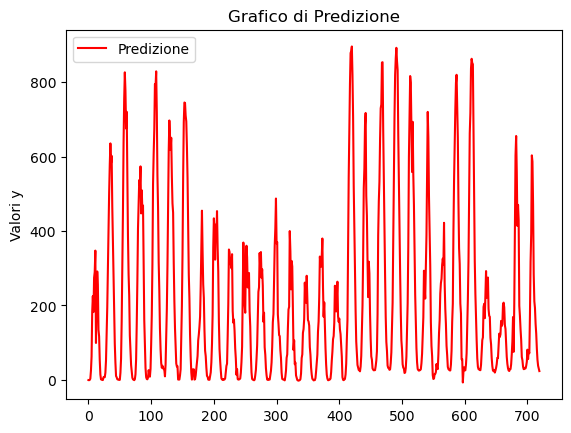

In [24]:
plt.plot(range(len(y_pred_A)), y_pred_A, label='Predizione', color='red', linestyle='-')

# Aggiungi una legenda
plt.legend()

# Aggiungi etichette agli assi
plt.ylabel('Valori y')

# Titolo del grafico
plt.title('Grafico di Predizione')

# Mostra il grafico
plt.show()

In [25]:
df = pd.DataFrame({'Prediction':y_pred_A})

In [26]:
threshold = 0.05
df['Prediction'] = df['Prediction'].apply(lambda x: 0 if x < threshold else x)

In [27]:
df.to_csv('C1.csv')
df

,Prediction
0,0.000000
1,0.000000
2,0.000000
3,2.962764
4,24.806409
...,...
715,83.474736
716,53.630515
717,37.726226
718,30.237943
